# 머신러닝 과제 11
강의자료에서 제공한 make_circles data를 이용하여 K-means++, DBSCAN, HDBSCAN을 적용하여 비교하라.

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

In [2]:
# make_circles data set
from sklearn.datasets import make_circles
X, y= make_circles(n_samples=1000, shuffle=True, noise=0.1, random_state=1214, factor=0.4)
print(X.shape, y.shape)

(1000, 2) (1000,)


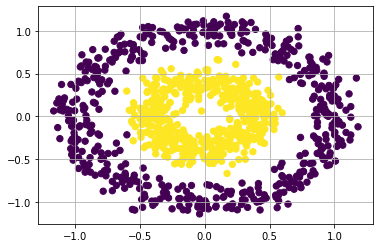

In [3]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=40)
plt.grid()
plt.show()

In [4]:
# scaling
X = StandardScaler().fit_transform(X)

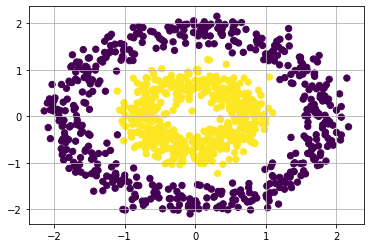

In [5]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=40)
plt.grid()
plt.show()

## 1. K-means ++
공간을 선분으로 나누는 **선형적 군집 형성**   
곡면형일때는 적합하지 않음

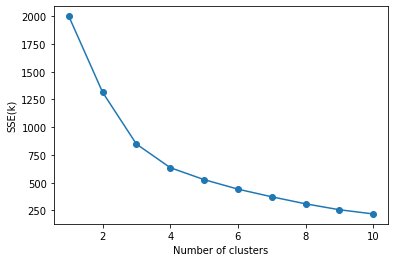

In [6]:
# Elbow method
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10,max_iter=1000, random_state=0)  
    # n_init=10: K-means++ with K=10을 의미
    
    km.fit(X)
    distortions.append(km.inertia_) # inertia_ : SSE를 구해주는 클래스 

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE(k)')
plt.show()

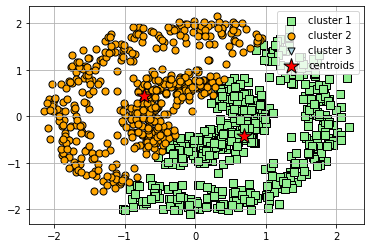

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='k-means++', n_init=10, 
            max_iter=1000, tol=1e-04, random_state=0)  # init='random': K-means를 의미
y_km = km.fit_predict(X)

# Plotting results
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange',
            marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue',
            marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red',
            marker='*', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

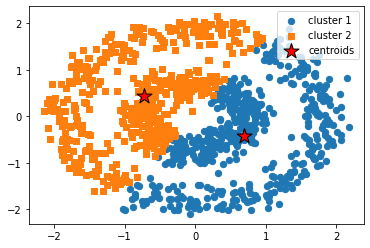

In [79]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, 
            max_iter=1000, tol=1e-04, random_state=0)  # init='random': K-means를 의미
y_db = km.fit_predict(X)

plt.scatter(X[y_db==0,0], X[y_db==0,1], marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], marker='s', s=40, label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red',
            marker='*', edgecolor='black', label='centroids')
plt.legend()
plt.show()

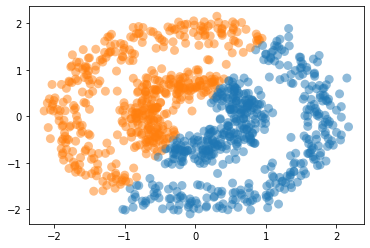

In [80]:
import seaborn as sns
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
palette = sns.color_palette()
cluster_colors = [palette[col]
                  if col >= 0 else (0.5, 0.5, 0.5) for col in
                  km.labels_]
plt.scatter(X.T[0], X.T[1], c=cluster_colors, **plot_kwds)

## silhouette coefficient (실루엣 계수)

For n_clusters = 2 The average silhouette_score is : 0.3244297452224615
For n_clusters = 4 The average silhouette_score is : 0.33579652647523794
For n_clusters = 6 The average silhouette_score is : 0.3595266047291579
For n_clusters = 10 The average silhouette_score is : 0.42923368401188033
For n_clusters = 20 The average silhouette_score is : 0.40708127620495005


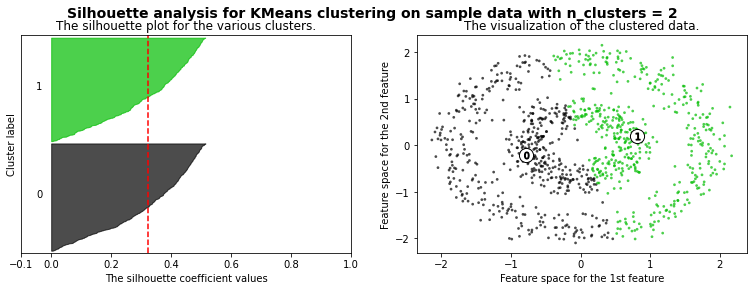

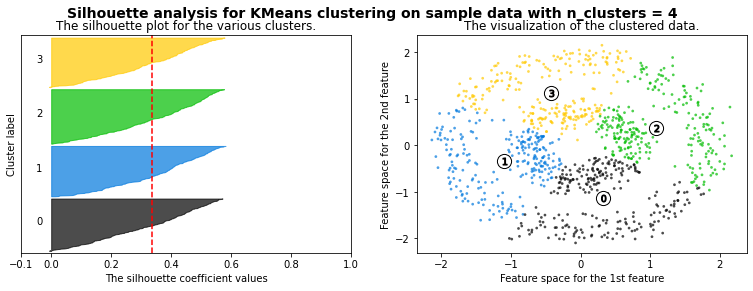

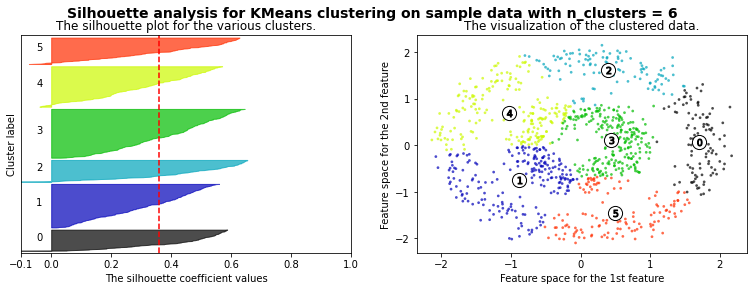

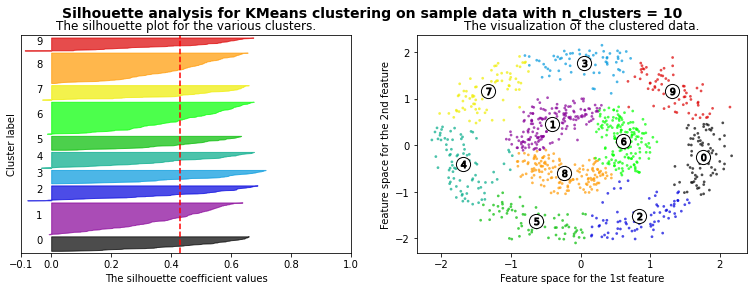

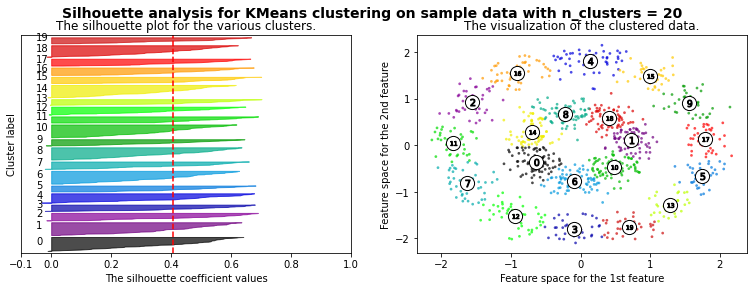

In [76]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 4, 6, 10, 20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## 2. DBSCAN

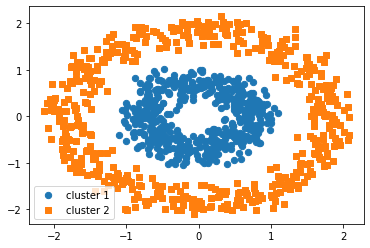

0.08074409489791852


In [32]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0], X[y_db==0,1], marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], marker='s', s=40, label='cluster 2')
plt.legend()
plt.show()
print(silhouette_score(X, y_db))

잡아내지 못하는 case를 회색으로 표시
but 대부분 잡아내는 모습임

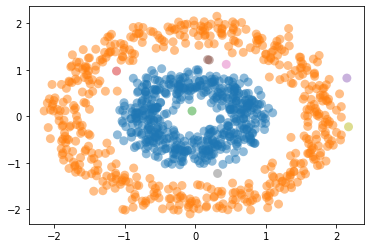

In [78]:
import seaborn as sns
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
palette = sns.color_palette()
cluster_colors = [palette[col]
                  if col >= 0 else (0.5, 0.5, 0.5) for col in
                  db.labels_]
plt.scatter(X.T[0], X.T[1], c=cluster_colors, **plot_kwds)

- 입실론을 올릴 때
> 군집의 개수가 너무 작아짐

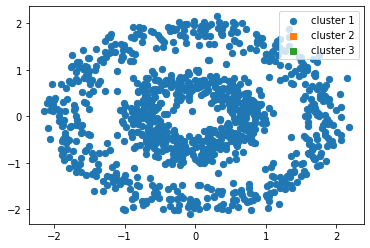

In [81]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0], X[y_db==0,1], marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], marker='s', s=40, label='cluster 2')
plt.scatter(X[y_db==2,0], X[y_db==2,1], marker='s', s=40, label='cluster 3')

plt.legend()
plt.show() # 군집의 개수가 너무 작아져 모두 하나의 군집으로 분류됨

- 입실론을 낮출 때
> 많은 관측치가 잡음으로 분류됨

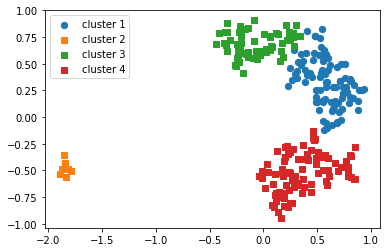

In [71]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0], X[y_db==0,1], marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], marker='s', s=40, label='cluster 2')
plt.scatter(X[y_db==2,0], X[y_db==2,1], marker='s', s=40, label='cluster 3')
plt.scatter(X[y_db==3,0], X[y_db==3,1], marker='s', s=40, label='cluster 4')

plt.legend()
plt.show() # 잡음으로 분류됨

- M(군집 형성을 위한 최소 관측치 개수)을 올릴 때
> 입실론-NN(nearest neighbor)의 개수가 M보다 작으면 이상치로 분류하므로, 이상치로 많이 분류됨. 

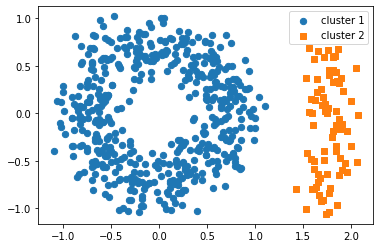

In [68]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0], X[y_db==0,1], marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], marker='s', s=40, label='cluster 2')
plt.legend()
plt.show() 

## 3. HDBSCAN

In [12]:
# pip install 필요
!pip install hdbscan

     |████████████████████████████████| 4.7MB 10.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301793 sha256=855fd97d1c7934626bc85edd36b5ff4a8b4176b0e4b085df801318998bc3ac06
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


#### M = 5


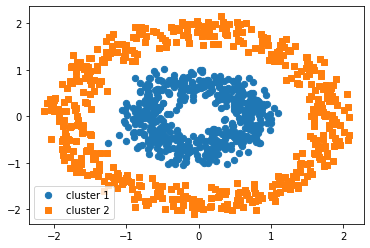

0.12336509912488046


In [39]:
import hdbscan
hdb=hdbscan.HDBSCAN(min_samples=5)
y_hdb = hdb.fit_predict(X)

plt.scatter(X[y_hdb==0,0], X[y_hdb==0,1], marker='o', s=40, label='cluster 1')
plt.scatter(X[y_hdb==1,0], X[y_hdb==1,1], marker='s', s=40, label='cluster 2')

plt.legend()
plt.show()
print(silhouette_score(X, y_hdb))

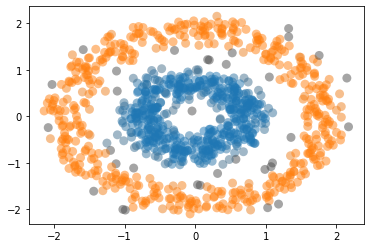

In [43]:
import seaborn as sns
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.3,0.3,0.3) for col, sat in
                  zip(hdb.labels_, hdb.probabilities_)]
plt.scatter(X.T[0], X.T[1], c=cluster_colors, **plot_kwds)

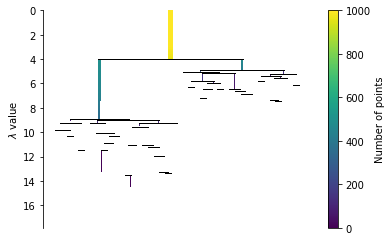

In [14]:
hdb.condensed_tree_.plot()

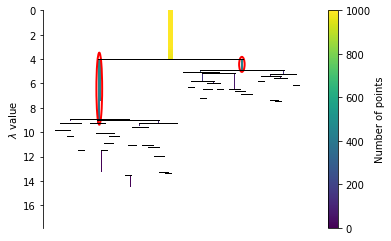

In [15]:
hdb.condensed_tree_.plot(select_clusters=True)

- 첫번째 군집의 분화는 람다 = 4에서 발생, 그 자식군집의 분화는 람다 = 8에서 발생    
- 안정성 측도 산출 후 최종적으로 2개의 군집 결정

#### M = 30 
한 군집 안에 최소 30개의 요소 포함되어야 함

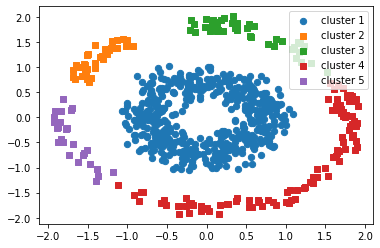

In [47]:
import hdbscan
hdb=hdbscan.HDBSCAN(min_samples=30)
y_hdb = hdb.fit_predict(X)

plt.scatter(X[y_hdb==0,0], X[y_hdb==0,1], marker='o', s=40, label='cluster 1')
plt.scatter(X[y_hdb==1,0], X[y_hdb==1,1], marker='s', s=40, label='cluster 2')
plt.scatter(X[y_hdb==2,0], X[y_hdb==2,1], marker='s', s=40, label='cluster 3')
plt.scatter(X[y_hdb==3,0], X[y_hdb==3,1], marker='s', s=40, label='cluster 4')
plt.scatter(X[y_hdb==4,0], X[y_hdb==4,1], marker='s', s=40, label='cluster 5')

plt.legend()
plt.show() # M이 극도로 클 때

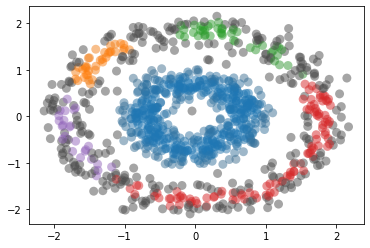

In [45]:
import seaborn as sns
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.3,0.3,0.3) for col, sat in
                  zip(hdb.labels_, hdb.probabilities_)]
plt.scatter(X.T[0], X.T[1], c=cluster_colors, **plot_kwds)

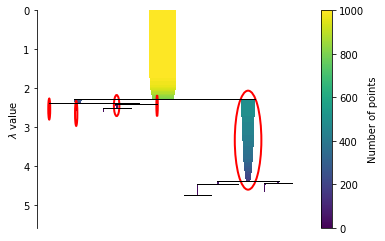

In [17]:
hdb.condensed_tree_.plot(select_clusters=True) # M이 극도로 클 때

#### M = 1
군집에 1개만 있어도 됨 > 군집 엄청많아짐

No handles with labels found to put in legend.


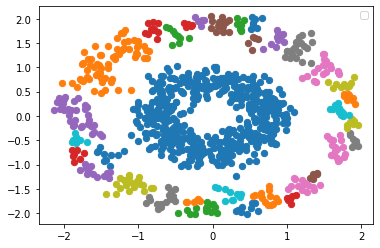

In [55]:
import hdbscan
hdb=hdbscan.HDBSCAN(min_samples=1)
y_hdb = hdb.fit_predict(X)

for i in range(100):
  plt.scatter(X[y_hdb==i,0], X[y_hdb==i,1], marker='o', s=40)

plt.legend()
plt.show() # M이 극도로 작을 때

군집이 매우 많아짐

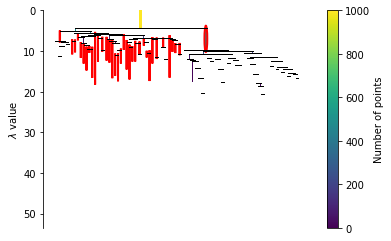

In [19]:
hdb.condensed_tree_.plot(select_clusters=True) # M이 극도로 작을 때

으... 이게뭐지  
아마 M이 너무 작으니까 한 군집에 적어도 포함되어야 하는 요소의 수가 적어도 돼서 군집이 엄청 많이생긴듯;;;;;;;;;;